In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings("ignore")

In [2]:
book1 = pd.read_csv('book.csv')
book1.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
book1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
book1.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


## Aprori Algorithm:

In [5]:
frequent_itemsets = apriori(book1, min_support = 0.1,use_colnames=True,verbose=1)

Processing 44 combinations | Sampling itemset size 4


In [6]:
print(len(frequent_itemsets))

39


In [7]:
print(frequent_itemsets.head())

   support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)


In [8]:
print(frequent_itemsets.sort_values('support',ascending=False).head())

    support             itemsets
2     0.431            (CookBks)
0     0.423           (ChildBks)
3     0.282           (DoItYBks)
6     0.276            (GeogBks)
10    0.256  (CookBks, ChildBks)


In [9]:
rules = association_rules(frequent_itemsets, metric= "confidence", min_threshold=0.9)
print(rules.head(10))

  antecedents consequents  antecedent support  consequent support  support  \
0  (ItalCook)   (CookBks)              0.1135               0.431   0.1135   

   confidence      lift  leverage  conviction  zhangs_metric  
0         1.0  2.320186  0.064582         inf        0.64185  


In [10]:
rules = association_rules(frequent_itemsets, metric= "confidence", min_threshold=0.8)
print(rules.head(10))

           antecedents consequents  antecedent support  consequent support  \
0           (ItalCook)   (CookBks)              0.1135               0.431   
1    (CookBks, RefBks)  (ChildBks)              0.1525               0.423   
2   (RefBks, ChildBks)   (CookBks)              0.1515               0.431   
3   (DoItYBks, ArtBks)   (CookBks)              0.1235               0.431   
4  (GeogBks, DoItYBks)   (CookBks)              0.1325               0.431   
5    (GeogBks, ArtBks)   (CookBks)              0.1275               0.431   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0   0.1135    1.000000  2.320186  0.064582         inf       0.641850  
1   0.1225    0.803279  1.899004  0.057993    2.933083       0.558594  
2   0.1225    0.808581  1.876058  0.057204    2.972534       0.550345  
3   0.1015    0.821862  1.906873  0.048272    3.194159       0.542591  
4   0.1085    0.818868  1.899926  0.051392    3.141354       0.546010  
5   0.1035    0.81176

In [11]:
rules = association_rules(frequent_itemsets, metric= "confidence", min_threshold=0.4)
print(rules.head())

  antecedents consequents  antecedent support  consequent support  support  \
0  (YouthBks)  (ChildBks)              0.2475               0.423    0.165   
1   (CookBks)  (ChildBks)              0.4310               0.423    0.256   
2  (ChildBks)   (CookBks)              0.4230               0.431    0.256   
3  (DoItYBks)  (ChildBks)              0.2820               0.423    0.184   
4  (ChildBks)  (DoItYBks)              0.4230               0.282    0.184   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.666667  1.576044  0.060308    1.731000       0.485714  
1    0.593968  1.404179  0.073687    1.421069       0.505870  
2    0.605201  1.404179  0.073687    1.441240       0.498856  
3    0.652482  1.542511  0.064714    1.660347       0.489842  
4    0.434988  1.542511  0.064714    1.270770       0.609543  


In [12]:
rules[rules.support>0.10].sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
22,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
61,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
65,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
68,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
42,"(RefBks, ChildBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
...,...,...,...,...,...,...,...,...,...,...
62,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
13,(ArtBks),(YouthBks),0.2410,0.2475,0.1010,0.419087,1.693281,0.041353,1.295375,0.539434
11,(DoItYBks),(YouthBks),0.2820,0.2475,0.1155,0.409574,1.654846,0.045705,1.274505,0.551134
12,(YouthBks),(ArtBks),0.2475,0.2410,0.1010,0.408081,1.693281,0.041353,1.282270,0.544094


In [13]:
rules[(rules.support>0.010)&(rules.confidence>0.4)].sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
22,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
61,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
65,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
68,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
42,"(RefBks, ChildBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
...,...,...,...,...,...,...,...,...,...,...
62,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
13,(ArtBks),(YouthBks),0.2410,0.2475,0.1010,0.419087,1.693281,0.041353,1.295375,0.539434
11,(DoItYBks),(YouthBks),0.2820,0.2475,0.1155,0.409574,1.654846,0.045705,1.274505,0.551134
12,(YouthBks),(ArtBks),0.2475,0.2410,0.1010,0.408081,1.693281,0.041353,1.282270,0.544094


In [14]:
rules[(rules.support>0.12)&(rules.confidence>0.4)].sort_values('confidence',ascending=False).shape

(44, 10)

In [15]:
rules[(rules.support>0.13)&(rules.confidence>0.4)].sort_values('confidence',ascending=False).shape

(26, 10)

In [16]:
rules[(rules.support>0.13)&(rules.confidence>0.4)].sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
38,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831
36,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928,0.562171
48,"(CookBks, GeogBks)",(ChildBks),0.1925,0.423,0.1495,0.776623,1.835989,0.068072,2.583081,0.563882
50,"(GeogBks, ChildBks)",(CookBks),0.1950,0.431,0.1495,0.766667,1.778809,0.065455,2.438571,0.543883
18,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
7,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
21,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689
19,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095,0.498047
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986


In [17]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_,consequents_
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714,YouthBks,ChildBks
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870,CookBks,ChildBks
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856,ChildBks,CookBks
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842,DoItYBks,ChildBks
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543,ChildBks,DoItYBks
...,...,...,...,...,...,...,...,...,...,...,...,...
65,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010,"GeogBks,DoItYBks",CookBks
66,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298,"CookBks,GeogBks",ArtBks
67,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866,"CookBks,ArtBks",GeogBks
68,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602,"GeogBks,ArtBks",CookBks


In [18]:
pivot = rules.pivot(index='antecedents_',columns='consequents_',values='confidence')
pivot

consequents_,ArtBks,ChildBks,CookBks,"CookBks,ChildBks","CookBks,DoItYBks","CookBks,GeogBks",DoItYBks,GeogBks,"GeogBks,ChildBks",RefBks,YouthBks
antecedents_,,,,,,,,,,,
ArtBks,NaN,0.674274,0.692946,0.524896,0.421162,0.429461,0.512448,0.529046,0.423237,NaN,0.419087
ChildBks,NaN,NaN,0.605201,NaN,NaN,NaN,0.434988,0.460993,NaN,NaN,NaN
"ChildBks,ArtBks",NaN,NaN,0.778462,NaN,NaN,NaN,NaN,0.627692,NaN,NaN,NaN
CookBks,NaN,0.593968,NaN,NaN,NaN,NaN,0.435035,0.446636,NaN,NaN,NaN
"CookBks,ArtBks",NaN,0.757485,NaN,NaN,NaN,NaN,0.607784,0.619760,NaN,NaN,NaN
"CookBks,ChildBks",0.494141,NaN,NaN,NaN,NaN,NaN,0.570312,0.583984,NaN,0.478516,0.503906
"CookBks,DoItYBks",0.541333,0.778667,NaN,NaN,NaN,NaN,NaN,0.578667,NaN,NaN,NaN
"CookBks,GeogBks",0.537662,0.776623,NaN,NaN,NaN,NaN,0.563636,NaN,NaN,NaN,NaN
"CookBks,RefBks",NaN,0.803279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


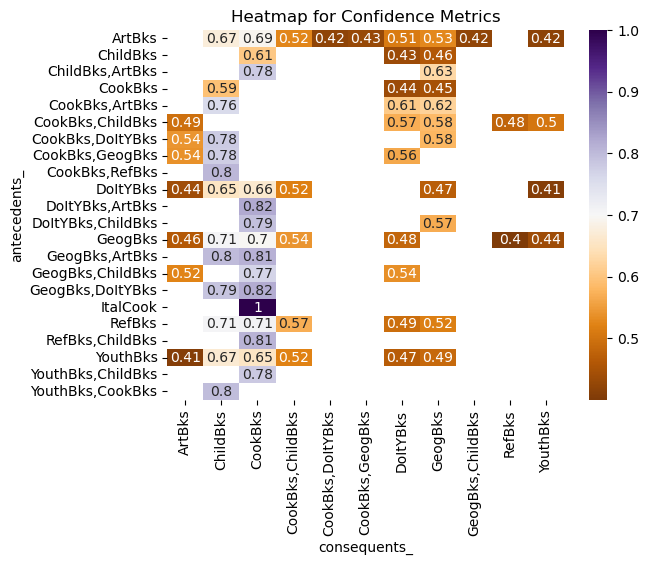

In [19]:
sns.heatmap(pivot,cmap='PuOr',annot=True)
plt.title('Heatmap for Confidence Metrics')
plt.show()

In [23]:
# metric= "lift" :

In [22]:
rules = association_rules(frequent_itemsets, metric= "lift", min_threshold=0.6)
print(rules.head())
rules.shape

  antecedents consequents  antecedent support  consequent support  support  \
0  (YouthBks)  (ChildBks)              0.2475              0.4230    0.165   
1  (ChildBks)  (YouthBks)              0.4230              0.2475    0.165   
2   (CookBks)  (ChildBks)              0.4310              0.4230    0.256   
3  (ChildBks)   (CookBks)              0.4230              0.4310    0.256   
4  (DoItYBks)  (ChildBks)              0.2820              0.4230    0.184   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.666667  1.576044  0.060308    1.731000       0.485714  
1    0.390071  1.576044  0.060308    1.233750       0.633449  
2    0.593968  1.404179  0.073687    1.421069       0.505870  
3    0.605201  1.404179  0.073687    1.441240       0.498856  
4    0.652482  1.542511  0.064714    1.660347       0.489842  


(100, 10)

In [26]:
rules = association_rules(frequent_itemsets, metric= "lift", min_threshold=0.9)
print(rules.head())
rules.shape

  antecedents consequents  antecedent support  consequent support  support  \
0  (YouthBks)  (ChildBks)              0.2475              0.4230    0.165   
1  (ChildBks)  (YouthBks)              0.4230              0.2475    0.165   
2   (CookBks)  (ChildBks)              0.4310              0.4230    0.256   
3  (ChildBks)   (CookBks)              0.4230              0.4310    0.256   
4  (DoItYBks)  (ChildBks)              0.2820              0.4230    0.184   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.666667  1.576044  0.060308    1.731000       0.485714  
1    0.390071  1.576044  0.060308    1.233750       0.633449  
2    0.593968  1.404179  0.073687    1.421069       0.505870  
3    0.605201  1.404179  0.073687    1.441240       0.498856  
4    0.652482  1.542511  0.064714    1.660347       0.489842  


(100, 10)

In [27]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_,consequents_
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714,YouthBks,ChildBks
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449,ChildBks,YouthBks
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870,CookBks,ChildBks
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856,ChildBks,CookBks
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842,DoItYBks,ChildBks
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866,"CookBks,ArtBks",GeogBks
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602,"GeogBks,ArtBks",CookBks
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355,CookBks,"GeogBks,ArtBks"
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114,GeogBks,"CookBks,ArtBks"


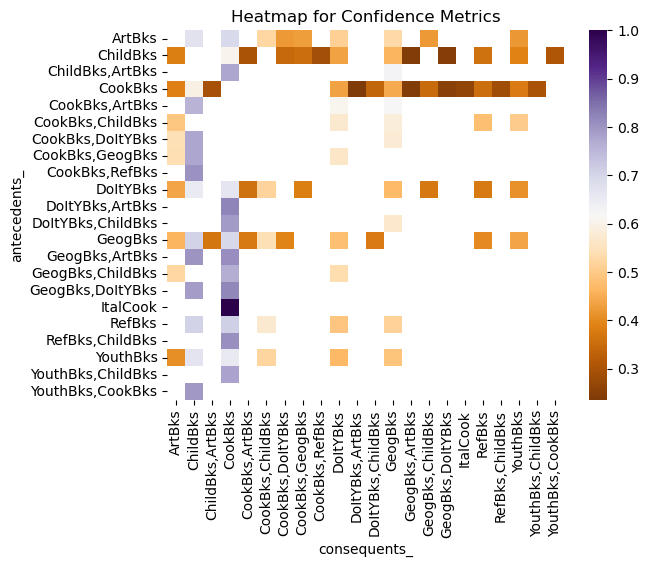

In [33]:
pivot = rules.pivot(index='antecedents_',columns='consequents_',values='confidence')
sns.heatmap(pivot,cmap='PuOr')
plt.title('Heatmap for Confidence Metrics')
plt.show()